Type:  <class 'numpy.ndarray'>
Shape:  (2048, 2448, 3)
Max:  255
Min:  0
Mean:  30.563103370417178
Standard Deviation:  13.724475872630947


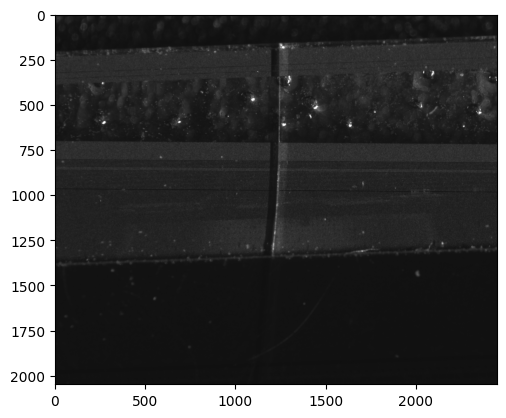

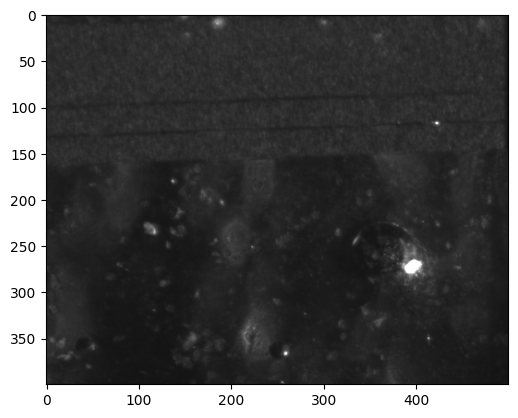

Image changed to Red channel


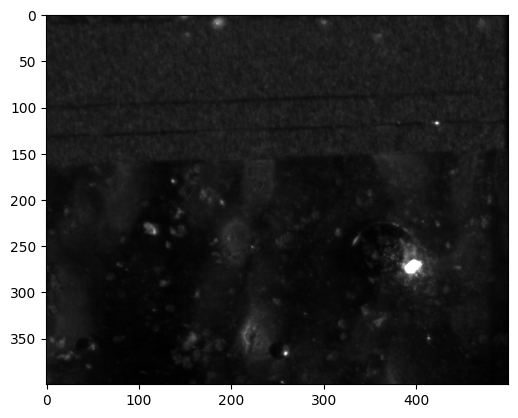

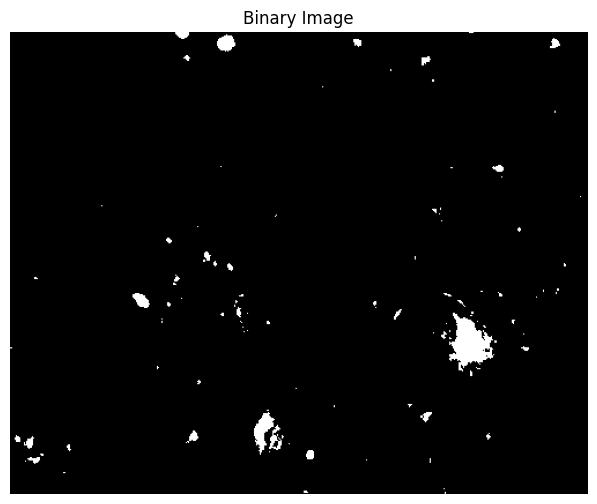

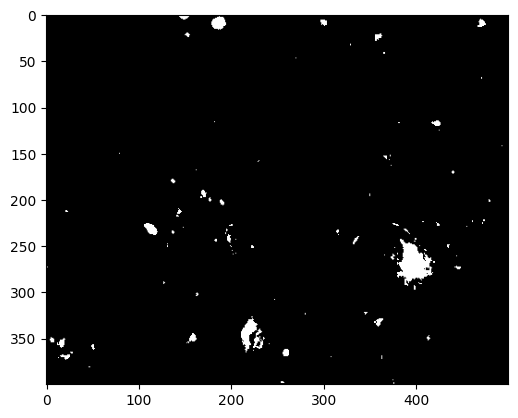

In [21]:
import numpy as np 
import cv2 
from pathlib import Path 
import matplotlib.pyplot as plt
import copy  # 用於深度複製物件
 
class ImageManager: 
    def __init__(self, path) -> None: 
        self.path = Path(path)
        self.image = cv2.imread(self.path.as_posix())  # 讀取圖像 
        if self.image is None: 
            raise ValueError(f"Cannot load image at {self.path}")  # 若圖像無法讀取，則拋出錯誤 
     
    def choose_rgb(self, channel: str):     
        channel = channel.lower() 
        if channel == 'b':  # 選擇藍色通道 
            self.image = self.image[:, :, 0] 
            print("Image changed to Blue channel") 
        elif channel == "g":  # 選擇綠色通道 
            self.image = self.image[:, :, 1] 
            print("Image changed to Green channel") 
        elif channel == "r":  # 選擇紅色通道 
            self.image = self.image[:, :, 2] 
            print("Image changed to Red channel") 
        else: 
            print("Invalid channel. Please choose 'r', 'g', or 'b'.") 
         
    def basic_array_info(self): 
        "基本資訊" 
        print("Type: ", type(self.image)) 
        print("Shape: ", self.image.shape) 
        print("Max: ", self.image.max()) 
        print("Min: ", self.image.min()) 
        print("Mean: ", self.image.mean()) 
        print("Standard Deviation: ", np.std(self.image)) 
 
    def save(self, name=None, output_folder=None): 
        # 如果未指定name，則使用原始文件名加上"_modified" 
        if name is None: 
            name = self.path.stem + "_modified" + self.path.suffix 
        else: 
            # 確保指定的名稱包含正確的文件後綴 
            if not name.endswith(self.path.suffix): 
                name += self.path.suffix 
 
        # 如果未指定output_folder，則使用與原始文件相同的文件夾 
        if output_folder is None: 
            output_folder = self.path.parent 
 
        # 構建最終的輸出路徑 
        output_path = Path(output_folder) / name 
 
        # 保存圖像到指定的路徑 
        success = cv2.imwrite(output_path.as_posix(), self.image) 
        if success: 
            print(f"Image saved to {output_path}") 
        else: 
            print(f"Failed to save image to {output_path}") 
     
    def show(self, axis=True): 
        # 根據圖像的維度來判斷顯示模式 
        if len(self.image.shape) == 2:  # 如果是灰度圖 
            plt.imshow(self.image, cmap="gray") 
        else:  # 彩色圖像 
            # OpenCV讀取的圖像是BGR順序，需要轉換為RGB順序 
            plt.imshow(cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)) 
         
        plt.axis('on' if axis else 'off')  # 顯示或隱藏軸 
        plt.show()  # 顯示圖像 
          
    def crop(self, x1, x2, y1, y2): 
        # 裁剪圖像 
        self.image = self.image[y1:y2, x1:x2] 
        self.show()  # 顯示裁剪後的圖像 
     
    def copy(self): 
        # 返回當前 ImageManager 物件的深度副本，保留當前圖像和屬性
        return copy.deepcopy(self)
 
    def process(self, function, params=None): 
        # 產生圖像副本，應用處理函數
        new_image = self.copy()  # 複製當前的 ImageManager
        if params:
            new_image.image = function(new_image.image, **params) 
        else:
            new_image.image = function(new_image.image) 
        return new_image 
 
# 使用範例 
origin_im = ImageManager(r'F:\Code\Digital-Image-Processing\Code\Resources\Private_Data\line_light_no_p.tif') 
origin_im.basic_array_info() 
origin_im.show()  # 顯示圖像 
origin_im.crop(700, 1200, 200, 600)  # 裁剪圖像 
origin_im.choose_rgb('r')  # 選擇紅色通道 
origin_im.show()  # 顯示紅色通道的圖像 
 
# # 應用處理函數，使用二值化
# new_im = origin_im.process(function=image_binary, params={'standard': 2, 'print_image': True, 'print_threshold': False}) 
# new_im.show()  # 顯示處理後的圖像


In [18]:
origin_im.image.shape, new_im.image.shape

((400, 500), (400, 500))

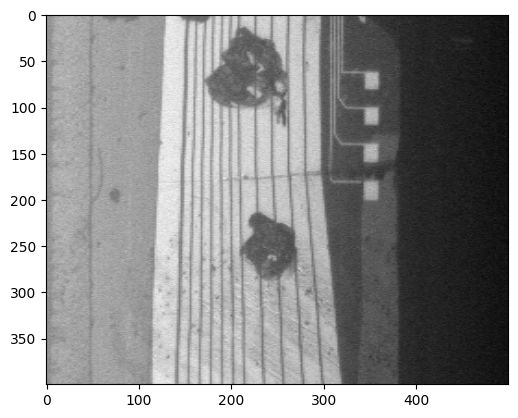

In [8]:
origin_im.choose_rgb('r')
origin_im.show()